# HydroGeoSines
## Outlier detection

In [1]:
import os
os.chdir("../../")
print("Current Working Directory: ", os.getcwd())

Current Working Directory:  /media/daniel/SharedData/Workspaces/GitHub/HydroGeoSines


In [8]:
# Load the HGS package
import hydrogeosines as hgs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydrogeosines.ext import outliers as outliers

In [5]:
site_fowlers = hgs.Site('Fowlers Gap', geoloc=[141.73099, -31.2934, 160])
site_fowlers.import_csv('tests/data/fowlers_gap/acworth_short.csv', 
                        input_category=['BP', 'GW', 'GW', 'GW', 'ET'],
                        utc_offset = 10,
                        unit=['m', 'm', 'm', 'm', 'm**2/s**2'],
                        loc_names = ["Baro", "FG822-1", "FG822-2", "Smith", "ET"],
                        how="add", check_duplicates=True)

Datetime was 'naive'. Localized and converted to UTC!
A new time series was added ...
No duplicate entries were found.


In [10]:
data_fowlers = site_fowlers.data
data_fowlers

,datetime,category,location,part,unit,value
0,2014-10-20 14:00:00+00:00,BP,Baro,all,m,10.1623
1,2014-10-20 14:15:00+00:00,BP,Baro,all,m,10.1670
2,2014-10-20 14:30:00+00:00,BP,Baro,all,m,10.1698
3,2014-10-20 14:45:00+00:00,BP,Baro,all,m,10.1733
4,2014-10-20 15:00:00+00:00,BP,Baro,all,m,10.1764
...,...,...,...,...,...,...
37295,2015-01-06 05:45:00+00:00,GW,Smith,all,m,85.5910
37296,2015-01-06 06:00:00+00:00,GW,Smith,all,m,85.5900
37297,2015-01-06 06:15:00+00:00,GW,Smith,all,m,85.5920
37298,2015-01-06 06:30:00+00:00,GW,Smith,all,m,85.5910


In [14]:
pre_data = outliers.find_outliers(data_fowlers)
pre_data.head(5)

,ident,datetime,variable,value
0,BP_Baro_all,2014-10-20 14:00:00+00:00,raw,10.1623
1,BP_Baro_all,2014-10-20 14:15:00+00:00,raw,10.1670
2,BP_Baro_all,2014-10-20 14:30:00+00:00,raw,10.1698
3,BP_Baro_all,2014-10-20 14:45:00+00:00,raw,10.1733
4,BP_Baro_all,2014-10-20 15:00:00+00:00,raw,10.1764


/media/daniel/SharedData/Workspaces/GitHub/HydroGeoSines/hydrogeosines/ext/outliers.py:75: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha = "right")


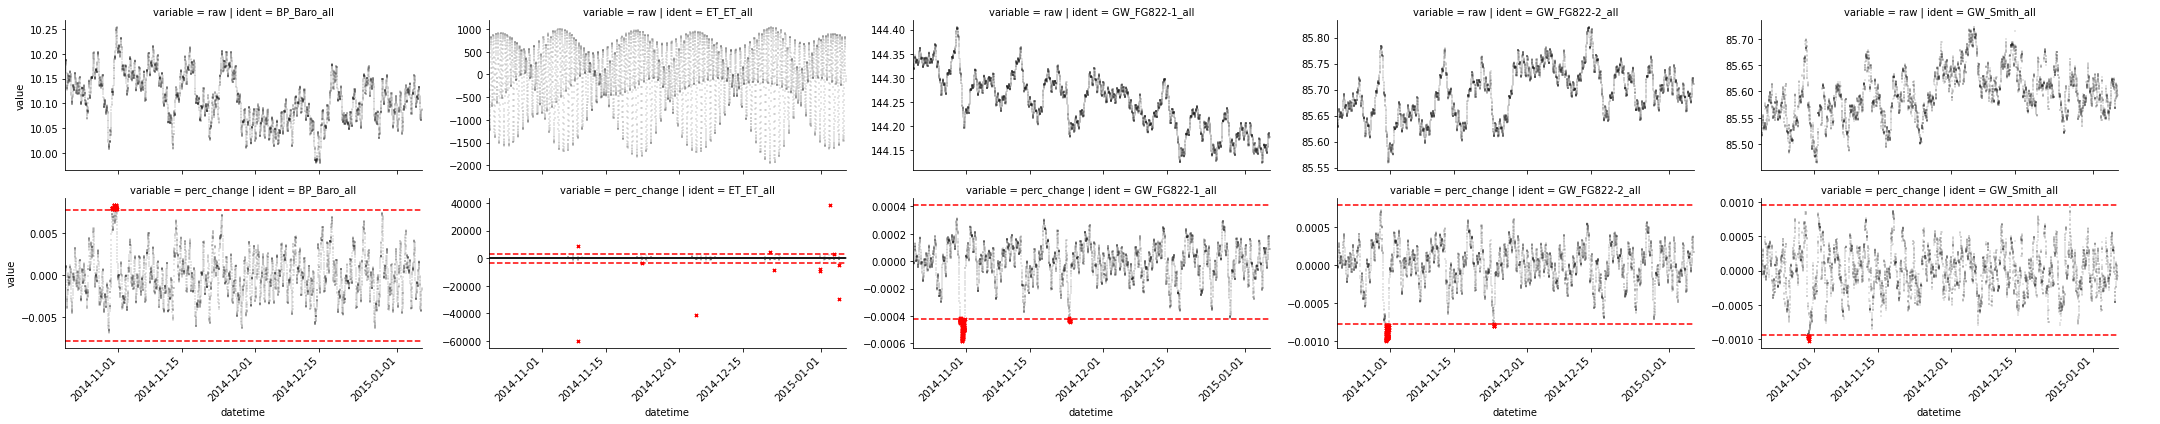

In [15]:
out = outliers.inspect_data(pre_data)

In [16]:
# these are the outliers
out

(-1.730827768296963,
 468.7651501873392,
            ident                  datetime     variable         value
 46508  ET_ET_all 2014-11-07 19:00:00+00:00  perc_change   2552.484630
 46509  ET_ET_all 2014-11-07 19:15:00+00:00  perc_change  -1719.414665
 46513  ET_ET_all 2014-11-07 20:15:00+00:00  perc_change  -1626.573833
 46514  ET_ET_all 2014-11-07 20:30:00+00:00  perc_change   2609.789191
 46608  ET_ET_all 2014-11-08 20:00:00+00:00  perc_change   9125.376350
 46609  ET_ET_all 2014-11-08 20:15:00+00:00  perc_change  -1431.372762
 46613  ET_ET_all 2014-11-08 21:15:00+00:00  perc_change -59883.056962
 47946  ET_ET_all 2014-11-22 18:30:00+00:00  perc_change  -2061.910677
 47951  ET_ET_all 2014-11-22 19:45:00+00:00  perc_change  -3622.272364
 48045  ET_ET_all 2014-11-23 19:15:00+00:00  perc_change   2613.524223
 48051  ET_ET_all 2014-11-23 20:45:00+00:00  perc_change  -2178.923759
 48995  ET_ET_all 2014-12-03 16:45:00+00:00  perc_change   1589.057968
 49090  ET_ET_all 2014-12-04 16:30:0